In [1]:
# 데이터 분석
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 # 전체 용량이 큰 데이터로 일단 데이터만 로드
df_train = pd.read_csv('train_V2.csv')
df_test = pd.read_csv('test_V2.csv')
df_test_y=pd.read_csv('sample_submission_V2.csv')

In [3]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
print(df_train.columns.values)

['Id' 'groupId' 'matchId' 'assists' 'boosts' 'damageDealt' 'DBNOs'
 'headshotKills' 'heals' 'killPlace' 'killPoints' 'kills' 'killStreaks'
 'longestKill' 'matchDuration' 'matchType' 'maxPlace' 'numGroups'
 'rankPoints' 'revives' 'rideDistance' 'roadKills' 'swimDistance'
 'teamKills' 'vehicleDestroys' 'walkDistance' 'weaponsAcquired'
 'winPoints' 'winPlacePerc']


In [5]:
len(df_train) 

4446966

In [6]:
len(df_test)

1934174

In [7]:
print(df_test.columns.values)

['Id' 'groupId' 'matchId' 'assists' 'boosts' 'damageDealt' 'DBNOs'
 'headshotKills' 'heals' 'killPlace' 'killPoints' 'kills' 'killStreaks'
 'longestKill' 'matchDuration' 'matchType' 'maxPlace' 'numGroups'
 'rankPoints' 'revives' 'rideDistance' 'roadKills' 'swimDistance'
 'teamKills' 'vehicleDestroys' 'walkDistance' 'weaponsAcquired'
 'winPoints']


In [8]:
df_train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
df_test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

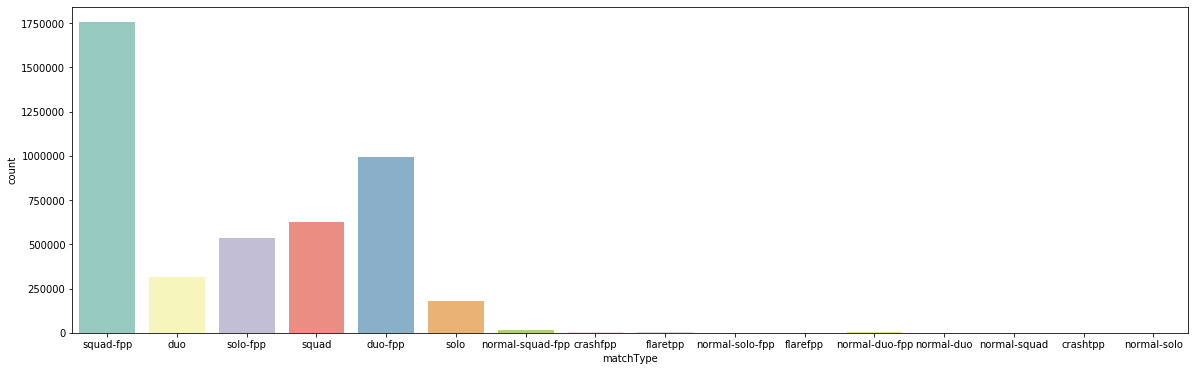

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x='matchType',data=df_train, palette='Set3')

In [11]:
df_train.matchType.value_counts()
#분석의 어려움을 고려 solo-fpp와 solo 데이터만 고려해 보기로 함

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [12]:
df_test['winPlacePerc']=df_test_y['winPlacePerc']

In [13]:
#매치타입 solo인 경우만 추출하여 CSV 저장
df=df_train['matchType'].str.contains('solo')
df_solo=df_train[df]
df_solo.to_csv('./solo_train.csv')

In [14]:
df=df_test['matchType'].str.contains('solo')
df_solo=df_test[df]
df_solo.to_csv('./solo_test.csv')

In [15]:
df_train = pd.read_csv('solo_train.csv')
#df_test = pd.read_csv('solo_test.csv')

In [16]:
#솔로 플레이에 부적합한 데이터 삭제
df_train.drop(['groupId','assists','DBNOs','matchType','numGroups','revives','teamKills'],axis=1,inplace=True)

In [17]:
#df_test.drop(['groupId','assists','DBNOs','matchType','numGroups','revives','teamKills'],axis=1,inplace=True)

In [18]:
print(df_train.columns.values)

['Unnamed: 0' 'Id' 'matchId' 'boosts' 'damageDealt' 'headshotKills'
 'heals' 'killPlace' 'killPoints' 'kills' 'killStreaks' 'longestKill'
 'matchDuration' 'maxPlace' 'rankPoints' 'rideDistance' 'roadKills'
 'swimDistance' 'vehicleDestroys' 'walkDistance' 'weaponsAcquired'
 'winPoints' 'winPlacePerc']


In [19]:
#불필요한 데이터 삭제
df_train.drop(['Unnamed: 0','matchId'],axis=1,inplace=True)
#df_test.drop(['Unnamed: 0','matchId'],axis=1,inplace=True)

In [20]:
print(df_train.columns.values)

['Id' 'boosts' 'damageDealt' 'headshotKills' 'heals' 'killPlace'
 'killPoints' 'kills' 'killStreaks' 'longestKill' 'matchDuration'
 'maxPlace' 'rankPoints' 'rideDistance' 'roadKills' 'swimDistance'
 'vehicleDestroys' 'walkDistance' 'weaponsAcquired' 'winPoints'
 'winPlacePerc']


In [21]:
df_train.isnull().sum()

Id                 0
boosts             0
damageDealt        0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
maxPlace           0
rankPoints         0
rideDistance       0
roadKills          0
swimDistance       0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [22]:
#df_test.isnull().sum()

In [23]:
#결측치 제거
df_train.dropna(inplace=True)

In [24]:
df_train.isnull().sum()

Id                 0
boosts             0
damageDealt        0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
maxPlace           0
rankPoints         0
rideDistance       0
roadKills          0
swimDistance       0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [25]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,315c96c26c9aac,0,100.000,0,0,45,0,1,1,58.53,...,97,1560,0.0,0,0.00,0,49.75,2,0,0.1875
1,311b84c6ff4390,0,8.538,0,0,48,1000,0,0,0.00,...,96,-1,2004.0,0,0.00,0,1089.00,6,1500,0.7368
2,b7807186e3f679,1,324.200,1,5,5,986,4,1,49.83,...,97,-1,1228.0,0,76.84,0,2050.00,6,1462,0.8750
3,92022479b92ce7,3,254.300,0,12,13,0,2,1,36.00,...,96,1536,2367.0,0,15.29,0,1787.00,3,0,0.8211
4,47143f942503e0,0,136.900,0,0,37,0,1,1,22.83,...,96,1500,0.0,0,0.00,0,270.70,1,0,0.3474


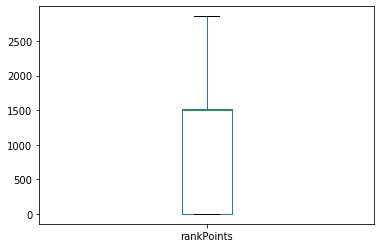

In [26]:
#Normalize와 이상값 제거
#rankPoint, 플레이어의 사용 버전에 따라 부여되기도하고, 부여되지 않기도 함(-1), 해당수치와 
df_train.rankPoints.plot.box()

In [27]:
df_train.rankPoints.value_counts()

-1       246336
 1500     72446
 0        20336
 1494      9793
 1497      9769
          ...  
 2333         1
 2161         1
 1134         1
 2159         1
 1286         1
Name: rankPoints, Length: 1127, dtype: int64

In [28]:
246336/720712*100

34.17953357235623

In [29]:
#전체의 34%가 결측치 임으로 평균값으로 대체
df_train.rankPoints[df_train.rankPoints>1].sum()/474376

1469.0314181155877

In [30]:
#결측치를 평균으로 대체
df_train['rankPoints']=df_train['rankPoints'].replace([-1],1469)
#df_test['rankPoints']=df_test['rankPoints'].replace([-1],1469)

In [31]:
#전체의 반이상이 측정되지 않음. 레이팅과 관련된 수치로 랭크게임을 플레이하지 않은 경우 개측되지 않음
df_train.winPoints.value_counts()

0       454040
1500     27977
1503      2916
1505      2914
1498      2896
         ...  
721          1
1110         1
870          1
596          1
990          1
Name: winPoints, Length: 1020, dtype: int64

In [32]:
df_train.drop(['winPoints'],axis=1,inplace=True)
#df_test.drop(['winPoints'],axis=1,inplace=True)

In [33]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,315c96c26c9aac,0,100.000,0,0,45,0,1,1,58.53,1424,97,1560,0.0,0,0.00,0,49.75,2,0.1875
1,311b84c6ff4390,0,8.538,0,0,48,1000,0,0,0.00,1967,96,1469,2004.0,0,0.00,0,1089.00,6,0.7368
2,b7807186e3f679,1,324.200,1,5,5,986,4,1,49.83,1886,97,1469,1228.0,0,76.84,0,2050.00,6,0.8750
3,92022479b92ce7,3,254.300,0,12,13,0,2,1,36.00,1371,96,1536,2367.0,0,15.29,0,1787.00,3,0.8211
4,47143f942503e0,0,136.900,0,0,37,0,1,1,22.83,1425,96,1500,0.0,0,0.00,0,270.70,1,0.3474


In [34]:
df_train['healsandboosts'] = df_train['heals'] + df_train['boosts']
#df_test['healsandboosts'] = df_test['heals'] + df_test['boosts']

In [35]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,healsandboosts
0,315c96c26c9aac,0,100.000,0,0,45,0,1,1,58.53,...,97,1560,0.0,0,0.00,0,49.75,2,0.1875,0
1,311b84c6ff4390,0,8.538,0,0,48,1000,0,0,0.00,...,96,1469,2004.0,0,0.00,0,1089.00,6,0.7368,0
2,b7807186e3f679,1,324.200,1,5,5,986,4,1,49.83,...,97,1469,1228.0,0,76.84,0,2050.00,6,0.8750,6
3,92022479b92ce7,3,254.300,0,12,13,0,2,1,36.00,...,96,1536,2367.0,0,15.29,0,1787.00,3,0.8211,15
4,47143f942503e0,0,136.900,0,0,37,0,1,1,22.83,...,96,1500,0.0,0,0.00,0,270.70,1,0.3474,0


In [36]:
df_train['headshot_rate'] = df_train['headshotKills'] / df_train['kills']
#df_test['headshot_rate'] = df_test['headshotKills'] / df_test['kills']
df_train['headshot_rate'] = df_train['headshot_rate'].fillna(0)
#df_test['headshot_rate'] = df_test['headshot_rate'].fillna(0)

In [37]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,healsandboosts,headshot_rate
0,315c96c26c9aac,0,100.000,0,0,45,0,1,1,58.53,...,1560,0.0,0,0.00,0,49.75,2,0.1875,0,0.00
1,311b84c6ff4390,0,8.538,0,0,48,1000,0,0,0.00,...,1469,2004.0,0,0.00,0,1089.00,6,0.7368,0,0.00
2,b7807186e3f679,1,324.200,1,5,5,986,4,1,49.83,...,1469,1228.0,0,76.84,0,2050.00,6,0.8750,6,0.25
3,92022479b92ce7,3,254.300,0,12,13,0,2,1,36.00,...,1536,2367.0,0,15.29,0,1787.00,3,0.8211,15,0.00
4,47143f942503e0,0,136.900,0,0,37,0,1,1,22.83,...,1500,0.0,0,0.00,0,270.70,1,0.3474,0,0.00


In [38]:
df_train['damageDealt']=df_train['damageDealt']/100
#df_test['damageDealt']=df_test['damageDealt']/100

In [39]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,healsandboosts,headshot_rate
0,315c96c26c9aac,0,1.00000,0,0,45,0,1,1,58.53,...,1560,0.0,0,0.00,0,49.75,2,0.1875,0,0.00
1,311b84c6ff4390,0,0.08538,0,0,48,1000,0,0,0.00,...,1469,2004.0,0,0.00,0,1089.00,6,0.7368,0,0.00
2,b7807186e3f679,1,3.24200,1,5,5,986,4,1,49.83,...,1469,1228.0,0,76.84,0,2050.00,6,0.8750,6,0.25
3,92022479b92ce7,3,2.54300,0,12,13,0,2,1,36.00,...,1536,2367.0,0,15.29,0,1787.00,3,0.8211,15,0.00
4,47143f942503e0,0,1.36900,0,0,37,0,1,1,22.83,...,1500,0.0,0,0.00,0,270.70,1,0.3474,0,0.00


In [40]:
df_train['totalDistance']=df_train['rideDistance']+df_train['swimDistance'
]+df_train['walkDistance']
#df_test['totalDistance']=df_test['rideDistance']+df_test['swimDistance'
#]+df_test['walkDistance']

In [41]:
df_train.head()

,Id,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,...,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,healsandboosts,headshot_rate,totalDistance
0,315c96c26c9aac,0,1.00000,0,0,45,0,1,1,58.53,...,0.0,0,0.00,0,49.75,2,0.1875,0,0.00,49.75
1,311b84c6ff4390,0,0.08538,0,0,48,1000,0,0,0.00,...,2004.0,0,0.00,0,1089.00,6,0.7368,0,0.00,3093.00
2,b7807186e3f679,1,3.24200,1,5,5,986,4,1,49.83,...,1228.0,0,76.84,0,2050.00,6,0.8750,6,0.25,3354.84
3,92022479b92ce7,3,2.54300,0,12,13,0,2,1,36.00,...,2367.0,0,15.29,0,1787.00,3,0.8211,15,0.00,4169.29
4,47143f942503e0,0,1.36900,0,0,37,0,1,1,22.83,...,0.0,0,0.00,0,270.70,1,0.3474,0,0.00,270.70


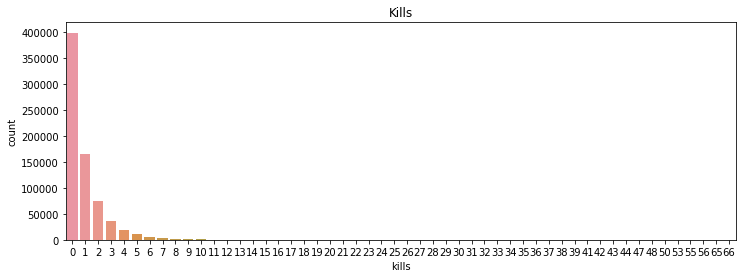

In [42]:
# 부정프로그램 사용자 정리
plt.figure(figsize=(12,4))
sns.countplot(data=df_train, x=df_train['kills']).set_title('Kills')
plt.show()

In [43]:
df_train.drop(df_train[df_train['kills'] > 25].index, inplace=True)
#df_test.drop(df_test[df_test['kills'] > 25].index, inplace=True)

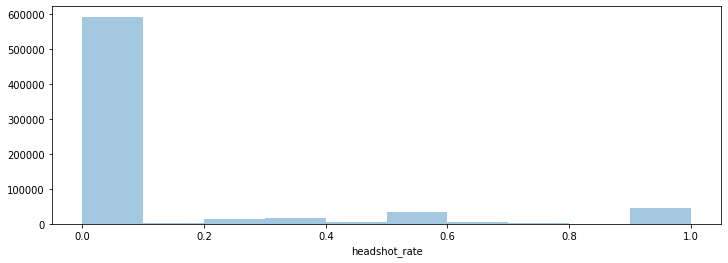

In [44]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['headshot_rate'], bins=10, kde=False)
plt.show()

In [45]:
df_train.drop(df_train[(df_train['kills'] > 9) & (df_train['headshot_rate']== 1)].index, inplace=True)
#df_test.drop(df_test[(df_test['kills'] > 9) & (df_test['headshot_rate']== 1)].index, inplace=True)

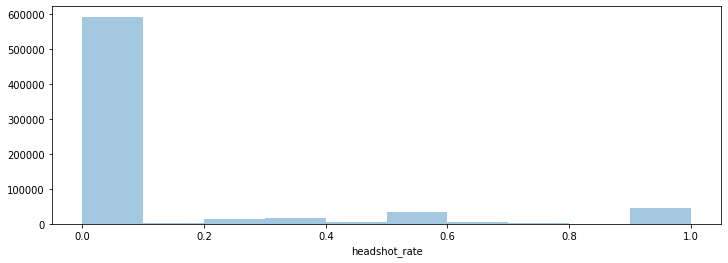

In [46]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['headshot_rate'], bins=10, kde=False)
plt.show()

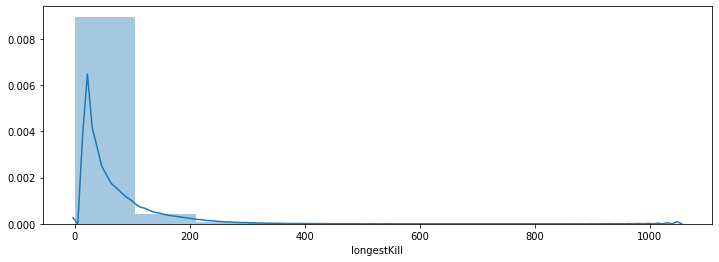

In [47]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['longestKill'], bins=10)
plt.show()

In [48]:
df_train.drop(df_train[df_train['longestKill'] >= 1000].index, inplace=True)
df_train['longestKill']=df_train['longestKill']/1000

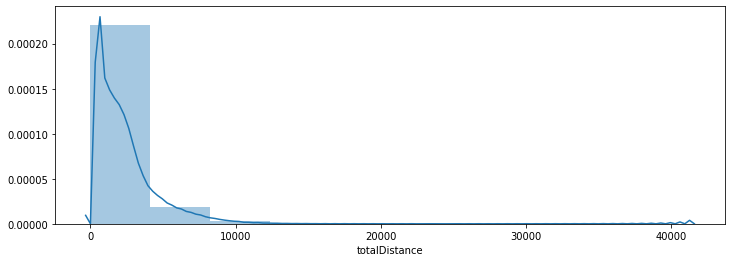

In [49]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['totalDistance'], bins=10)
plt.show()

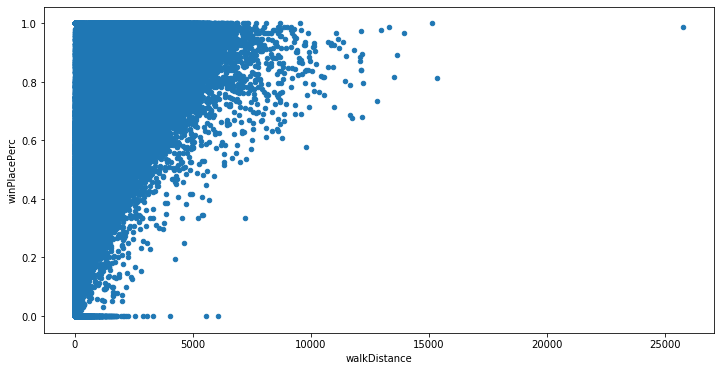

In [50]:
df_train.plot(x="walkDistance",y="winPlacePerc", kind="scatter", figsize = (12,6))

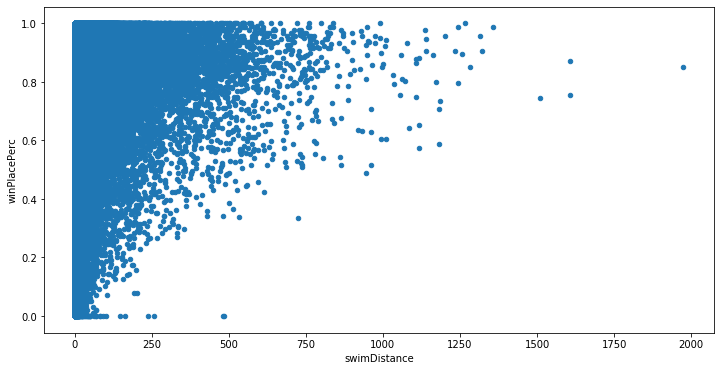

In [51]:
df_train.plot(x="swimDistance",y="winPlacePerc", kind="scatter", figsize = (12,6))

In [52]:
df_train.drop(df_train[(df_train['totalDistance'] < 500) & (df_train['winPlacePerc']>0.5)].index, inplace=True)
df_train.drop(df_train[(df_train['totalDistance'] < 1000) & (df_train['winPlacePerc']>0.8)].index, inplace=True)

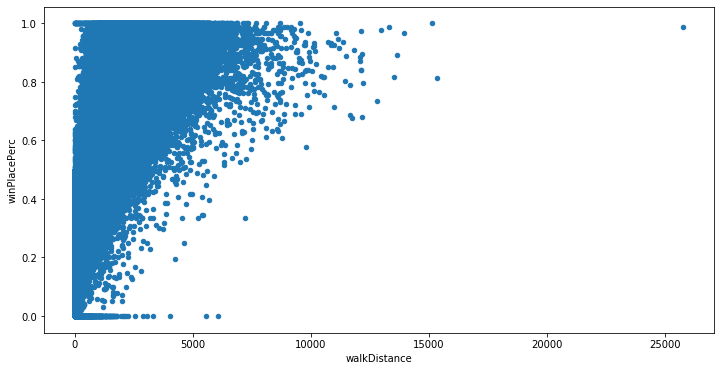

In [53]:
df_train.plot(x="walkDistance",y="winPlacePerc", kind="scatter", figsize = (12,6))

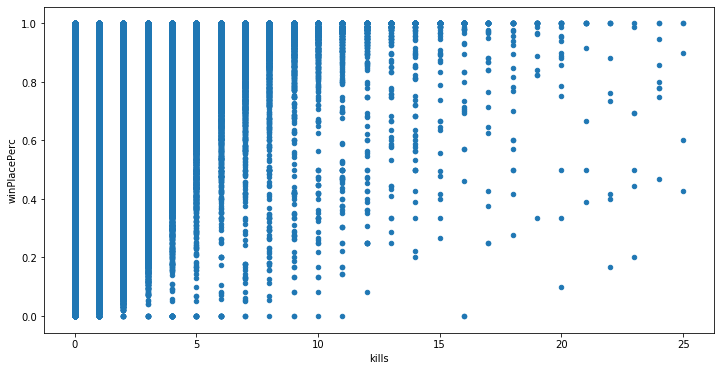

In [54]:
df_train.plot(x="kills",y="winPlacePerc", kind="scatter", figsize = (12,6))

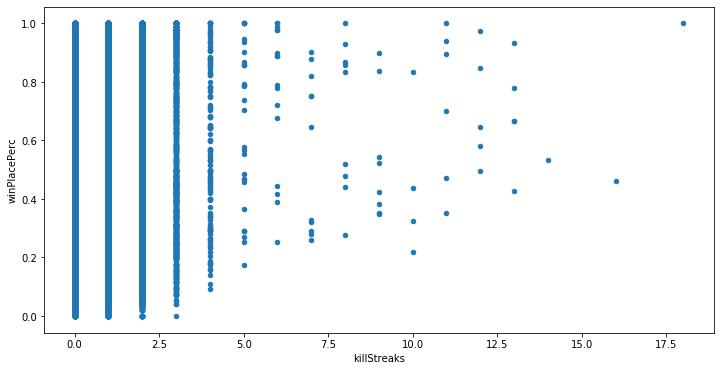

In [55]:
df_train.plot(x="killStreaks",y="winPlacePerc", kind="scatter", figsize = (12,6))

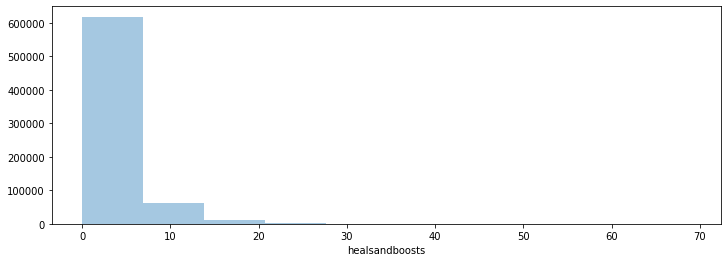

In [56]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['healsandboosts'], bins=10, kde=False)
plt.show()

In [57]:
df_train.drop(df_train[df_train['totalDistance'] >= 20000].index, inplace=True)
df_train['totalDistance']=df_train['totalDistance']/1000
#df_test.drop(df_test[df_test['totalDistance'] >= 20000].index, inplace=True)
#df_test['totalDistance']=df_test['totalDistance']/100

In [58]:
df_train['walkDistance']=df_train['walkDistance']/1000
df_train['swimDistance']=df_train['swimDistance']/1000
df_train['rideDistance']=df_train['rideDistance']/1000
#df_test['walkDistance']=df_test['walkDistance']/1000
#df_test['swimDistance']=df_test['swimDistance']/1000
#df_test['rideDistance']=df_test['rideDistance']/1000

In [59]:
df_train['matchDuration']=df_train['matchDuration']/60
#df_test['matchDuration']=df_test['matchDuration']/60

In [60]:
y=df_train['winPlacePerc']
y=y.replace([0],0.001)
x1=df_train.drop(['winPlacePerc'],axis=1)
x=x1.drop(['Id'],axis=1)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)

In [62]:
reg =linear_model.LinearRegression()
model=reg.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))
#생각보다 나쁘지 않은 결과
#학습결과가 테스트보다 높다면 과적합 의심, 하지만 높지 않아서 다행

0.8962155084969806
0.8982273043249853


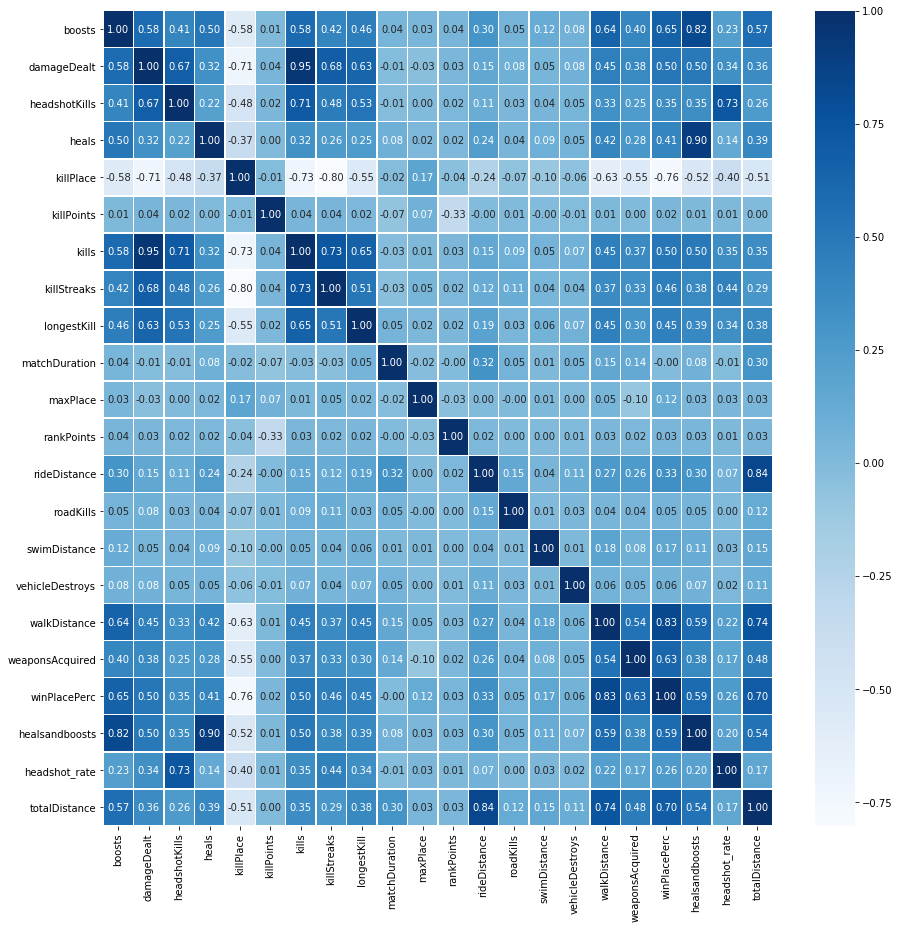

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

[Text(0, 0, 'const'),
 Text(0, 0, 'boosts'),
 Text(0, 0, 'damageDealt'),
 Text(0, 0, 'headshotKills'),
 Text(0, 0, 'heals'),
 Text(0, 0, 'killPlace'),
 Text(0, 0, 'killPoints'),
 Text(0, 0, 'kills'),
 Text(0, 0, 'killStreaks'),
 Text(0, 0, 'longestKill'),
 Text(0, 0, 'matchDuration'),
 Text(0, 0, 'maxPlace'),
 Text(0, 0, 'rankPoints'),
 Text(0, 0, 'rideDistance'),
 Text(0, 0, 'roadKills'),
 Text(0, 0, 'swimDistance'),
 Text(0, 0, 'vehicleDestroys'),
 Text(0, 0, 'walkDistance'),
 Text(0, 0, 'weaponsAcquired'),
 Text(0, 0, 'healsandboosts'),
 Text(0, 0, 'headshot_rate'),
 Text(0, 0, 'totalDistance')]

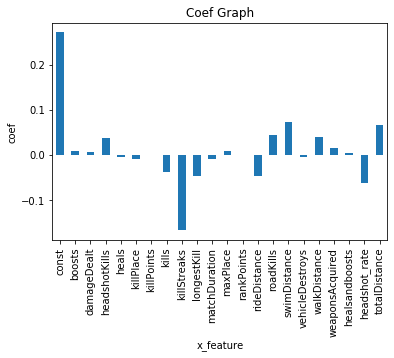

In [64]:
X_train=sm.add_constant(x_train)
models=sm.OLS(y_train, X_train).fit()


coefs=models.params.tolist()
coefs_series=pd.Series(coefs)
x_labels=models.params.index.tolist()
ax=coefs_series.plot(kind='bar')
ax.set_title("Coef Graph")
ax.set_xlabel('x_feature')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

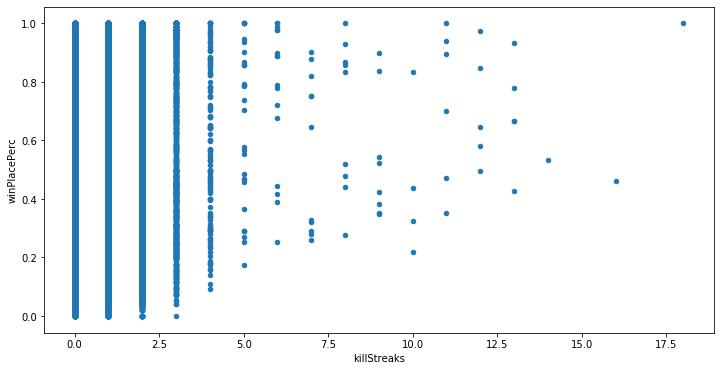

In [65]:
df_train.plot(x="killStreaks",y="winPlacePerc", kind="scatter", figsize = (12,6))

In [66]:
regr = make_pipelineStandardScaler(), LinearSVR(C=1.0 ,random_state=0, tol=1e-5))
odel2=regr.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

In [67]:
reg =make_pipeline(StandardScaler(), linear_model.LinearRegression())
model=reg.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

In [68]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [69]:
model_sc=reg.fit(x_train_sc, y_train)
print(model_sc.score(x_train_sc, y_train))

0.8962155088065142


[Text(0, 0, 'const'),
 Text(0, 0, 'x1'),
 Text(0, 0, 'x2'),
 Text(0, 0, 'x3'),
 Text(0, 0, 'x4'),
 Text(0, 0, 'x5'),
 Text(0, 0, 'x6'),
 Text(0, 0, 'x7'),
 Text(0, 0, 'x8'),
 Text(0, 0, 'x9'),
 Text(0, 0, 'x10'),
 Text(0, 0, 'x11'),
 Text(0, 0, 'x12'),
 Text(0, 0, 'x13'),
 Text(0, 0, 'x14'),
 Text(0, 0, 'x15'),
 Text(0, 0, 'x16'),
 Text(0, 0, 'x17'),
 Text(0, 0, 'x18'),
 Text(0, 0, 'x19'),
 Text(0, 0, 'x20'),
 Text(0, 0, 'x21')]

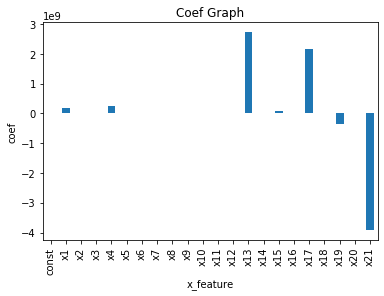

In [70]:
X_train_sc=sm.add_constant(x_train_sc)
models=sm.OLS(y_train, X_train_sc).fit()


coefs=models.params.tolist()
coefs_series=pd.Series(coefs)
x_labels=models.params.index.tolist()
ax=coefs_series.plot(kind='bar')
ax.set_title("Coef Graph")
ax.set_xlabel('x_feature')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [71]:
vif=pd.DataFrame() 
vif['VIF Factor']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif.round(1)

C:\Users\Duri\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,boosts
1,15.0,damageDealt
2,6.0,headshotKills
3,inf,heals
4,27.1,killPlace
5,1.7,killPoints
6,19.5,kills
7,7.9,killStreaks
8,2.3,longestKill
9,36.0,matchDuration


In [72]:
x1_train=df_train[['boosts', 'heals', 'rideDistance', 'swimDistance', 'walkDistance']]
x2_train=df_train[['headshotKills','headshot_rate','weaponsAcquired','vehicleDestroys','roadKills','longestKill','killPoints']]

In [73]:
model_1=reg.fit(x1_train, y)
print(model.score(x1_train, y))

0.7244730133545425


In [74]:
model_2=reg.fit(x2_train, y)
print(model.score(x2_train, y))

0.4724257345894618
